# CZ3004 MDP Algorithms

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import queue
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [24]:
test1 = np.arange(400)
test1 = test1.reshape(20,20)

test1_mat = np.zeros_like(test1)
print(test1_mat)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [68]:
print(test1_mat)

[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 3 0 0 2 1 2 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 2]
 [2 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 2 1 2 0 0 3 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [2 0 4 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 2]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]


In [23]:
# Helper functions

def resetField(field):
    newField = np.zeros_like(field)
    for i in range(0, 20, 19):
        for j in range(0, 20):
            newField[i][j] = 2
    for i in range(0, 20):
        for j in range(0, 20, 19):
            newField[i][j] = 2
    return newField

def setObstacle(mat, y, x, direction):
    for i in range(-1, 2):
        for j in range(-1, 2):
            mat[y+i][x+j] = 2
    mat[y][x] = 1
    if direction == "North":
        mat[y-4][x] = 3
        node = Node(x, y-4)
    elif direction == "East":
        mat[y][x+4] = 3
        node = Node(x+4, y)
    elif direction == "South":
        mat[y+4][x] = 3
        node = Node(x, y+4)
    else:
        mat[y][x-4] = 3
        node = Node(x-4, y)
    goalNodes.append(node)

def setRobotLocation(mat, y, x):
    mat[y][x] = 4
    startNode = Node(x, y)

def printField(mat):
    f = plt.figure(figsize = (10 , 10))
    plt.imshow(mat)
    plt.xticks(np.arange(0, 20, 1))
    plt.yticks(np.arange(0, 20, 1))
    plt.show()

class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y

startNode = Node(0, 0)
goalNodes = []

In [88]:
# Create a Graph class
class MazeGraph(object):
    ''' Class to represent a Graph
     Construction : Using Edges
    '''
    def __init__(self):
        self.edges = {}

    def all_edges(self):
        return self.edges

    def neighbors(self, node):
        return self.edges[node] 

# Function to convert a maze to a graph
def maze_to_graph(mazeGrid):
    ''' Converts a 2D binary maze to corresponding graph
        Input : 2D NumPy array with 0 and 1 as elements
        Output : MazeGraph corresponding to input maze
    '''
    mazeGraph = MazeGraph()
    (height, width) = mazeGrid.shape

    for i in range(height):
        for j in range(width):

            # Only consider blank cells as nodes
            if mazeGrid[i,j] >= 3 or mazeGrid[i,j] == 0:
                neighbors = []

                # Adjacent cell : Top
                if (i > 0) and mazeGrid[i-1,j] >= 3 or mazeGrid[i-1,j] == 0 :
                    neighbors.append(((i-1,j), 1))

                # Adjacent cell : Left
                if (j > 0) and mazeGrid[i,j-1] >= 3 or mazeGrid[i,j-1] == 0:
                    neighbors.append(((i,j-1), 1))

                # Adjacent cell : Bottom
                if (i < height - 1) and mazeGrid[i+1,j] >= 3 or mazeGrid[i+1,j] == 0:
                    neighbors.append(((i+1,j), 1))

                # Adjacent cell : Right
                if (j < width - 1) and mazeGrid[i,j+1] >= 3 or mazeGrid[i,j+1] == 0:
                    neighbors.append(((i,j+1), 1))

                # Insert edges in the graph
                if len(neighbors) > 0:
                    mazeGraph.edges[(i,j)] = neighbors
                
    return mazeGraph

# Helper functions to display a Graph
def showBinaryMazeGraph(mazeGraph):
    ''' Display a graph using networkx
    Input : MazeGraph from 2D maze
    Output : Input graph displayed
    '''
    edgeDict = mazeGraph.all_edges()
    edgeList = []
    for node in edgeDict:
        for neighbor, weight in edgeDict[node]:
            edgeList.append((node,neighbor, {'weight': weight}))
                
    G = nx.Graph()
    G.add_edges_from(edgeList)
    
    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_nodes(G, pos, node_size = 1000)
    nx.draw_networkx_edges(G, pos, width = 3)
    nx.draw_networkx_labels(G, pos, font_size = 10)
    
    plt.axis("off")
    plt.show()
    
# Helper functions to work with the Maze with Path
def showBinaryMazePath(mazeGrid, mazePath):
    ''' Display the maze corresponding to a binary grid
    Display path(s) superimposed on the binary grid
    Input : 2D NumPy array with 0 and 1 as elements
    Input : 2D coordinates of the paths on the maze
    Output : Heatmap grid of the maze with the path
    '''
    (height, width) = mazeGrid.shape
    mazeGrid = mazeGrid * 255 # just to match standard pixel value

    for node in mazePath:
        mazeGrid[node[0], node[1]] = 128 # half level of grayscale (0 to 255)

    f = plt.figure(figsize = (width,height))
    heatmap(mazeGrid, vmin = 0, vmax = 255, cmap = "Greys", cbar = False)

In [85]:
def nearestNeighbour(mat, goalNodes):
    v = 0
    visited = []
    for i in range(len(goalNodes)):
        visited.append(0)
    visited[v] = 1
    for i in range(len(goalNodes)-1):
        # find closest goal store in w (return index)
        index = byGridDistance(goalNodes, visited, v)
        v = index
        visited[v] = 1
        print("Coordinate x: ",goalNodes[v].x,", y: ",goalNodes[v].y)
    
def byGridDistance(goalNodes, visited, v):
    smallestDist = 40
    index = -1
    for i in range(len(goalNodes)):
        if visited[i] == 0:
            curNode = goalNodes[v]
            checkNode = goalNodes[i]
            dist = abs(curNode.x - checkNode.x) + abs(curNode.y - checkNode.y)
            if dist < smallestDist:
                smallestDist = dist
                index = i
    return index

# Breadth-First-Search (BFS) with FIFO Queue
def breadth_first_search(mazeGraph, start, goal):
    ''' Function to perform BFS to find path in a graph
    Input : Graph with the start and goal vertices
    Output : Dict of explored vertices in the graph
    '''
    frontier = queue.Queue() # FIFO Queue for Frontier

    # initialization
    frontier.put(start) # Add the start node to frontier
    explored = {} # Dict of explored nodes {node : parentNode}
    explored[start] = None # start node has no parent node
    processed = 0 # Count of total nodes processed

    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()
        processed += 1

        # stop when goal is reached
        if currentNode == goal:
            break

        # explore every single neighbor of current node
        for nextNode, weight in mazeGraph.neighbors(currentNode):

            # ignore if it has already been explored
            if nextNode not in explored:

                # put new node in frontier
                frontier.put(nextNode)

                # assign current node as parent
                explored[nextNode] = currentNode

    return explored, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents
def reconstruct_path(explored, start, goal):
    currentNode = goal # start at the goal node
    path = [] # initiate the blank path
    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]
    path.append(start) # append start node for completeness
    path.reverse() # reverse the path from start to goal
    return path

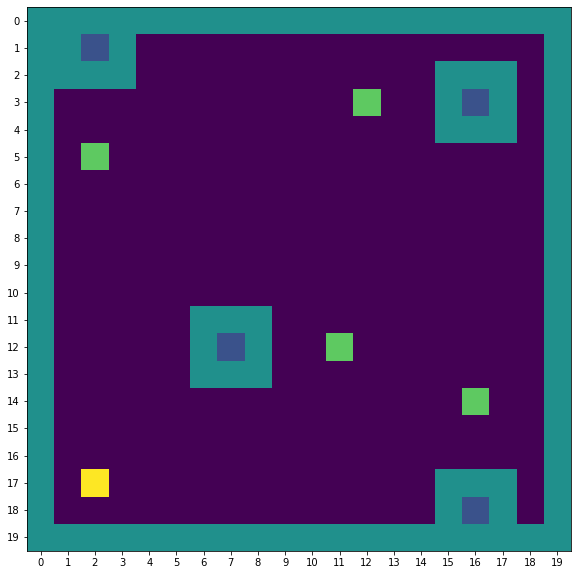

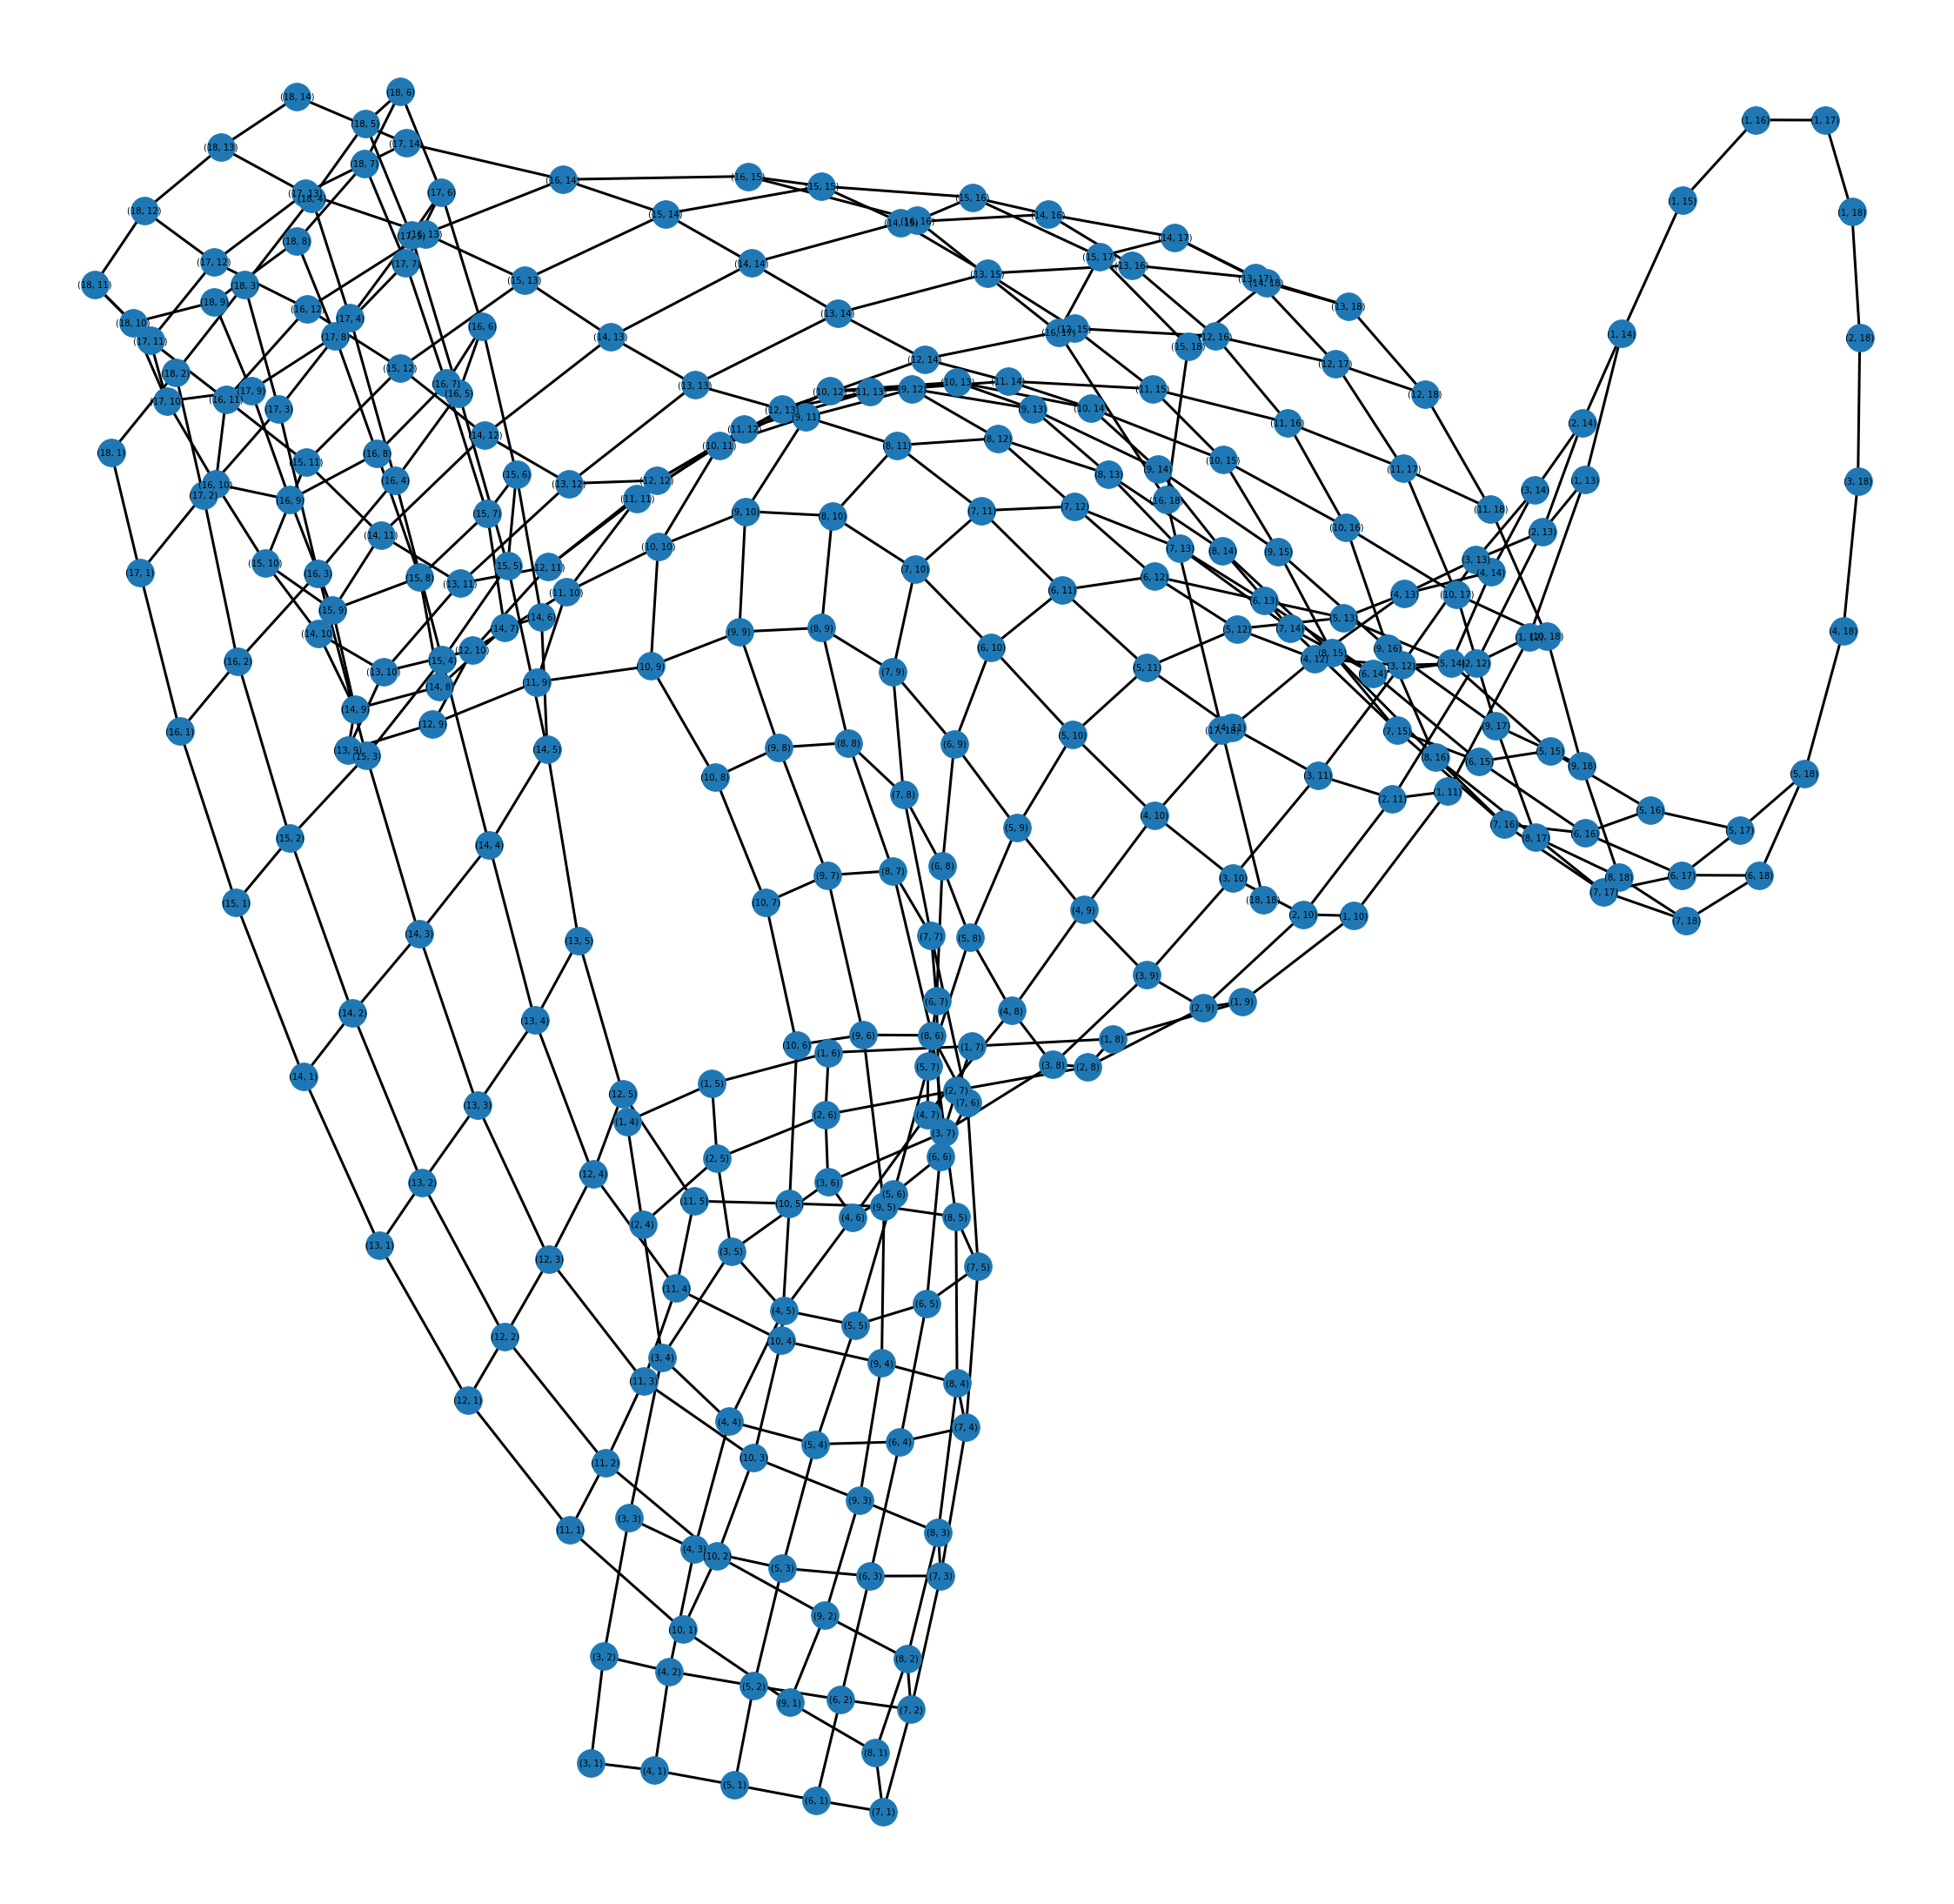

[<__main__.Node object at 0x00000200B7B90880>, <__main__.Node object at 0x00000200B7B907C0>, <__main__.Node object at 0x00000200B7B90C10>, <__main__.Node object at 0x00000200B7B90E50>]
[<__main__.Node object at 0x00000200B7762D90>, <__main__.Node object at 0x00000200B7B90880>, <__main__.Node object at 0x00000200B7B907C0>, <__main__.Node object at 0x00000200B7B90C10>, <__main__.Node object at 0x00000200B7B90E50>]
Coordinate x:  2 , y:  5
Coordinate x:  12 , y:  3
Coordinate x:  11 , y:  12
Coordinate x:  16 , y:  14


In [86]:
# Configure starting field
goalNodes = []
test1_mat = resetField(test1)

# b, a
setObstacle(test1_mat, 18, 16, "North")
setObstacle(test1_mat, 12, 7, "East")
setObstacle(test1_mat, 1, 2, "South")
setObstacle(test1_mat, 3, 16, "West")

setRobotLocation(test1_mat, 17, 2)

printField(test1_mat)

# Convert the maze to a graph
mazegraph = maze_to_graph(test1_mat)
showBinaryMazeGraph(mazegraph)

print(startNode)
print(goalNodes)
goalNodes.insert(0, startNode)
print(goalNodes)
nearestNeighbour(test1_mat, goalNodes)